# Preprocessing

### Split data train tes val

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def stratified_split_dataset(source_dir, train_dir, val_dir, test_dir, train_size=0.6, val_size=0.2):
    # Buat direktori jika belum ada
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Loop melalui setiap kelas
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            # Ambil semua gambar dalam direktori kelas
            images = os.listdir(class_path)

            # Buat label yang sesuai dengan jumlah gambar
            labels = [class_name] * len(images)

            # Split data secara stratified untuk train dan sisanya (val + test)
            train_images, val_test_images, _, val_test_labels = train_test_split(
                images, labels, test_size=1 - train_size, stratify=labels, random_state=42
            )

            # Hitung proporsi val_size relatif terhadap (val + test)
            test_size_adjusted = (1 - train_size - val_size) / (1 - train_size)

            # Split data val dan test secara stratified
            val_images, test_images = train_test_split(
                val_test_images, test_size=test_size_adjusted, stratify=val_test_labels, random_state=42
            )

            # Fungsi untuk menyalin file
            def copy_images(images, src_class_path, dst_dir):
                for img in images:
                    src = os.path.join(src_class_path, img)
                    dst = os.path.join(dst_dir, class_name)
                    os.makedirs(dst, exist_ok=True)  # Buat direktori kelas
                    shutil.copy(src, dst)

            # Salin data ke direktori masing-masing
            copy_images(train_images, class_path, train_dir)
            copy_images(val_images, class_path, val_dir)
            copy_images(test_images, class_path, test_dir)

            # Print jumlah gambar yang disalin untuk setiap kelas
            print(f"Class '{class_name}': {len(train_images)} train, {len(val_images)} val, {len(test_images)} test")

# Define paths
dataset_path = "/content/drive/MyDrive/Periapical_Xrays4x2"
train_directory = "/content/train"
val_directory = "/content/val"
test_directory = "/content/test"

# Split the dataset
stratified_split_dataset(dataset_path, train_directory, val_directory, test_directory)


Class 'Primary Endodontic Lesion': 148 train, 50 val, 50 test
Class 'Primary Periodontal Lesion': 141 train, 47 val, 48 test
Class 'True Combined Lesions': 157 train, 52 val, 53 test
Class 'Primary Endo with Secondary Perio': 146 train, 49 val, 49 test


### Augmentasi dan split dataset

In [ ]:
# Data augmentation untuk training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.1,
    brightness_range=[0.95, 1.05],
    horizontal_flip=False,
    fill_mode='nearest'
)

# Data preprocessing untuk validation dan test tanpa augmentasi
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

## Validasi tidak pakai augmentasi

In [ ]:
# Generator untuk data train
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Generator untuk data validation
validation_generator = validation_datagen.flow_from_directory(
    '/content/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Generator untuk data test
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 592 images belonging to 4 classes.
Found 198 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


## pakai augmentasi validasi

In [ ]:
# Generator untuk data train
train_generator1 = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Generator untuk data validation
validation_generator1 = train_datagen.flow_from_directory(
    '/content/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Generator untuk data test
test_generator1 = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 592 images belonging to 4 classes.
Found 198 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


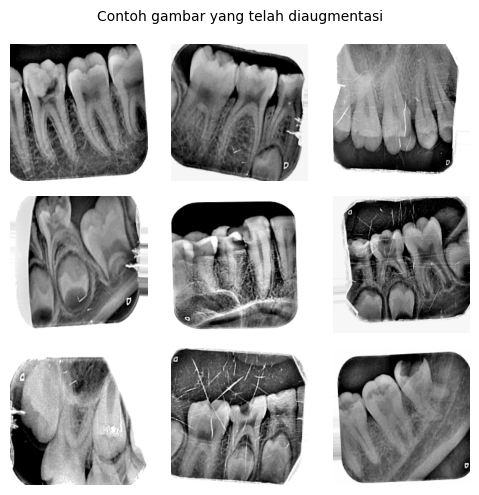

In [ ]:
# Visualisasi Data Augmentasi
augmented_images, _ = next(train_generator)
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Contoh gambar yang telah diaugmentasi', fontsize=10)
plt.tight_layout()
plt.show()